In [1]:
!gdown --id 1EdqTkztvFjVRu0tgplODmyG9dXwoyX1b
!gdown --id 1WE4Jb_orPxExM7vb8PtL_s3OUWoMW8Ux

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1EdqTkztvFjVRu0tgplODmyG9dXwoyX1b
To: /content/train_hq.zip
100% 843M/843M [00:08<00:00, 102MB/s] 
/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1WE4Jb_orPxExM7vb8PtL_s3OUWoMW8Ux
To: /content/train_masks.zip
100% 30.5M/30.5M [00:00<00:00, 77.2MB/s]


In [2]:
! unzip train_hq.zip
! unzip train_masks.zip

Выходные данные были обрезаны до нескольких последних строк (5000).
  inflating: train_masks/0789bed99cb8_09_mask.gif  
 extracting: train_masks/0789bed99cb8_10_mask.gif  
 extracting: train_masks/0789bed99cb8_11_mask.gif  
 extracting: train_masks/0789bed99cb8_12_mask.gif  
  inflating: train_masks/0789bed99cb8_13_mask.gif  
  inflating: train_masks/0789bed99cb8_14_mask.gif  
  inflating: train_masks/0789bed99cb8_15_mask.gif  
  inflating: train_masks/0789bed99cb8_16_mask.gif  
 extracting: train_masks/0795e132d090_01_mask.gif  
 extracting: train_masks/0795e132d090_02_mask.gif  
 extracting: train_masks/0795e132d090_03_mask.gif  
 extracting: train_masks/0795e132d090_04_mask.gif  
 extracting: train_masks/0795e132d090_05_mask.gif  
 extracting: train_masks/0795e132d090_06_mask.gif  
 extracting: train_masks/0795e132d090_07_mask.gif  
 extracting: train_masks/0795e132d090_08_mask.gif  
 extracting: train_masks/0795e132d090_09_mask.gif  
 extracting: train_masks/0795e132d090_10_mask.gi

In [3]:
!ls

sample_data  train_hq  train_hq.zip  train_masks  train_masks.zip


In [4]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import os
from PIL import Image

In [5]:
files_hq = sorted([train_hq
    for train_hq in os.listdir('train_hq')
])
files_masks = sorted([train_masks
    for train_masks in os.listdir('train_masks')
])
print(len(files_hq),len(files_masks),
      '\n',files_masks[:10],'\n',files_hq[:10],)
try:
    os.mkdir('/content/train_masks_png')
except:
  pass
try:
    os.mkdir('/content/train_masks_jpg')
except:
  pass

5088 5088 
 ['00087a6bd4dc_01_mask.gif', '00087a6bd4dc_02_mask.gif', '00087a6bd4dc_03_mask.gif', '00087a6bd4dc_04_mask.gif', '00087a6bd4dc_05_mask.gif', '00087a6bd4dc_06_mask.gif', '00087a6bd4dc_07_mask.gif', '00087a6bd4dc_08_mask.gif', '00087a6bd4dc_09_mask.gif', '00087a6bd4dc_10_mask.gif'] 
 ['00087a6bd4dc_01.jpg', '00087a6bd4dc_02.jpg', '00087a6bd4dc_03.jpg', '00087a6bd4dc_04.jpg', '00087a6bd4dc_05.jpg', '00087a6bd4dc_06.jpg', '00087a6bd4dc_07.jpg', '00087a6bd4dc_08.jpg', '00087a6bd4dc_09.jpg', '00087a6bd4dc_10.jpg']


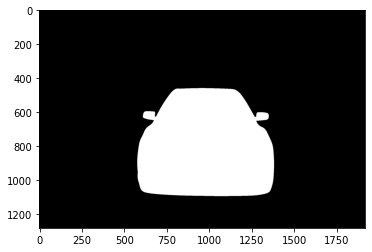

In [6]:
cap = cv2.VideoCapture('train_masks/00087a6bd4dc_01_mask.gif')
ret, mask = cap.read()
# cap.release()
plt.imshow(mask)

In [7]:
for i in range(len(files_masks)):
    gif = 'train_masks/'+ files_masks[i]
    img = Image.open(gif)
    background = Image.new("RGB", img.size, (255, 255, 255))
    background.paste(img)
    background.save('train_masks_jpg/' + gif.split('/')[1].split('.')[0] + ".jpg", 'JPEG', optimize=True, quality=70)
    img.save('train_masks_png/' + gif.split('/')[1].split('.')[0] + ".png", 'png', optimize=True, quality=70)


In [8]:
files_masks_png = sorted([
    train_masks_png
    for train_masks_png in os.listdir('train_masks_png')
])
files_masks_jpg = sorted([
    train_masks_png
    for train_masks_png in os.listdir('train_masks_jpg')
])
print(files_masks_jpg[:10],'\n',files_masks_png[:10],'\n',files_hq[:10])

['00087a6bd4dc_01_mask.jpg', '00087a6bd4dc_02_mask.jpg', '00087a6bd4dc_03_mask.jpg', '00087a6bd4dc_04_mask.jpg', '00087a6bd4dc_05_mask.jpg', '00087a6bd4dc_06_mask.jpg', '00087a6bd4dc_07_mask.jpg', '00087a6bd4dc_08_mask.jpg', '00087a6bd4dc_09_mask.jpg', '00087a6bd4dc_10_mask.jpg'] 
 ['00087a6bd4dc_01_mask.png', '00087a6bd4dc_02_mask.png', '00087a6bd4dc_03_mask.png', '00087a6bd4dc_04_mask.png', '00087a6bd4dc_05_mask.png', '00087a6bd4dc_06_mask.png', '00087a6bd4dc_07_mask.png', '00087a6bd4dc_08_mask.png', '00087a6bd4dc_09_mask.png', '00087a6bd4dc_10_mask.png'] 
 ['00087a6bd4dc_01.jpg', '00087a6bd4dc_02.jpg', '00087a6bd4dc_03.jpg', '00087a6bd4dc_04.jpg', '00087a6bd4dc_05.jpg', '00087a6bd4dc_06.jpg', '00087a6bd4dc_07.jpg', '00087a6bd4dc_08.jpg', '00087a6bd4dc_09.jpg', '00087a6bd4dc_10.jpg']


In [9]:
files_masks_png_sort = ['train_masks_png/' + train_masks_png
    for train_masks_png in files_masks_png
]
files_masks_jpg_sort = ['train_masks_jpg/' + train_masks_jpg
    for train_masks_jpg in files_masks_jpg
]
files_hq_sort = ['train_hq/' + train_hq
    for train_hq in files_hq
]
print(files_masks_jpg_sort[:10],'\n',files_masks_png_sort[:10],'\n',files_hq_sort[:10])

['train_masks_jpg/00087a6bd4dc_01_mask.jpg', 'train_masks_jpg/00087a6bd4dc_02_mask.jpg', 'train_masks_jpg/00087a6bd4dc_03_mask.jpg', 'train_masks_jpg/00087a6bd4dc_04_mask.jpg', 'train_masks_jpg/00087a6bd4dc_05_mask.jpg', 'train_masks_jpg/00087a6bd4dc_06_mask.jpg', 'train_masks_jpg/00087a6bd4dc_07_mask.jpg', 'train_masks_jpg/00087a6bd4dc_08_mask.jpg', 'train_masks_jpg/00087a6bd4dc_09_mask.jpg', 'train_masks_jpg/00087a6bd4dc_10_mask.jpg'] 
 ['train_masks_png/00087a6bd4dc_01_mask.png', 'train_masks_png/00087a6bd4dc_02_mask.png', 'train_masks_png/00087a6bd4dc_03_mask.png', 'train_masks_png/00087a6bd4dc_04_mask.png', 'train_masks_png/00087a6bd4dc_05_mask.png', 'train_masks_png/00087a6bd4dc_06_mask.png', 'train_masks_png/00087a6bd4dc_07_mask.png', 'train_masks_png/00087a6bd4dc_08_mask.png', 'train_masks_png/00087a6bd4dc_09_mask.png', 'train_masks_png/00087a6bd4dc_10_mask.png'] 
 ['train_hq/00087a6bd4dc_01.jpg', 'train_hq/00087a6bd4dc_02.jpg', 'train_hq/00087a6bd4dc_03.jpg', 'train_hq/00087a6

['train_hq/32ff007d9505_02.jpg' 'train_hq/9274d0b3caa8_14.jpg'
 'train_hq/6d21aad248e4_09.jpg' 'train_hq/11fcda0a9e1c_01.jpg'
 'train_hq/ce74dfdf123b_14.jpg' 'train_masks_jpg/32ff007d9505_02_mask.jpg'
 'train_masks_jpg/9274d0b3caa8_14_mask.jpg'
 'train_masks_jpg/6d21aad248e4_09_mask.jpg'
 'train_masks_jpg/11fcda0a9e1c_01_mask.jpg'
 'train_masks_jpg/ce74dfdf123b_14_mask.jpg']


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  This is separate from the ipykernel package so we can avoid doing imports until


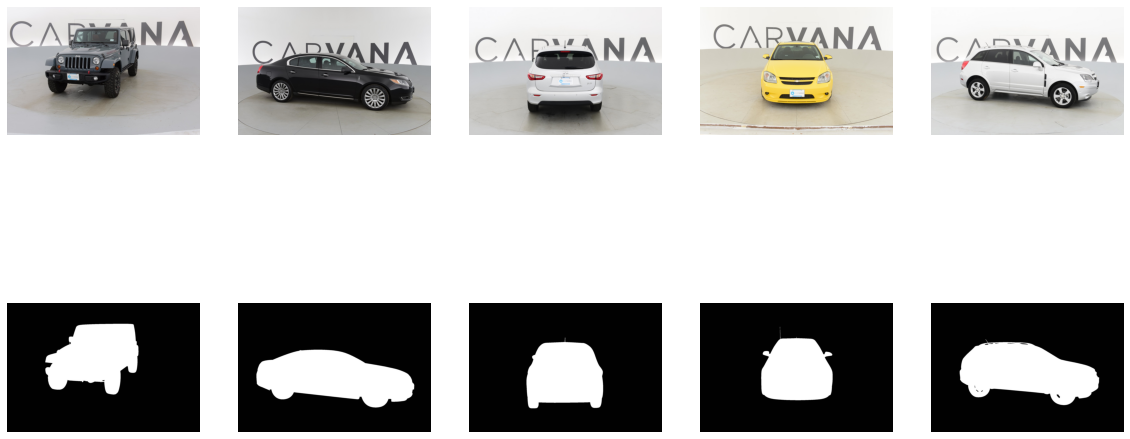

(1280, 1918, 3)


In [10]:
indices = np.random.randint(low=0, high=5088, size=(5))
sample_hq = np.array(files_hq_sort)[[indices]]
sample_masks = np.array(files_masks_jpg_sort)[[indices]]
# sample = np.hstack([sample_hq, sample_masks])
sample = np.hstack([sample_hq,sample_masks])
fig, ax = plt.subplots(2,5, figsize=(20,10))
print(sample)
for i,s in enumerate(sample):
    ax[i//5, i%5].axis('off')
    ax[i//5, i%5].imshow(
        cv2.imread(s)[:,:,::-1],
    )
plt.show()
print(cv2.imread(s)[:,:,::-1].shape)

In [11]:
from IPython.display import clear_output
import os

import cv2

import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader, Dataset
from torchvision import datasets, transforms, utils
from torch.autograd import Variable

from torch.nn import Conv2d as Conv2D
import torch.nn.init as init

from torch.nn import Upsample

In [12]:
import torch
from torchvision.transforms import Compose, ToTensor
from torchvision import datasets, transforms, utils

In [13]:
class CarDataset(torch.utils.data.Dataset):
    def __init__(self, files: list, labels: list):
        """Initializes DogsCatsDataset with passed list of files.
        Args:
            files: list of files,
            labels: list of labels.
        """
        self.files = files
        self.labels = labels

        self.to_tensor = transforms.ToTensor() 
        

    def __getitem__(self, idx: int):
        """Returns the object by given index.
        Args:
            idx - index of the file.
        Returns:
            processed image.
        """

        file = self.files[idx]
        image_1 = cv2.imread(file, cv2.IMREAD_GRAYSCALE)
        image_1 = cv2.resize(image_1, (512, 512))

        labels = self.labels[idx]
        image_2 = cv2.imread(labels, cv2.IMREAD_GRAYSCALE)
        image_2 = cv2.resize(image_2, (512, 512))
        
        return self.to_tensor(image_1), self.to_tensor(image_2)
        # return image_1, image_2
        
    def __len__(self):
        """Returns length of files containing in dataset."""
        
        return len(self.files)

In [14]:
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, Dataset
data_train, data_val, label_train, label_val = train_test_split(files_hq_sort[:500], files_masks_jpg_sort[:500], test_size=0.2)
train_dataset = CarDataset(data_train, label_train)
val_dataset = CarDataset(data_val, label_val)
train_loader = DataLoader(train_dataset, batch_size=1,shuffle=True, pin_memory=True)
val_loader = DataLoader(val_dataset, batch_size=1)

In [ ]:
train_features, train_labels = next(iter(train_loader))
print(train_features.shape)

(1, 512, 512)


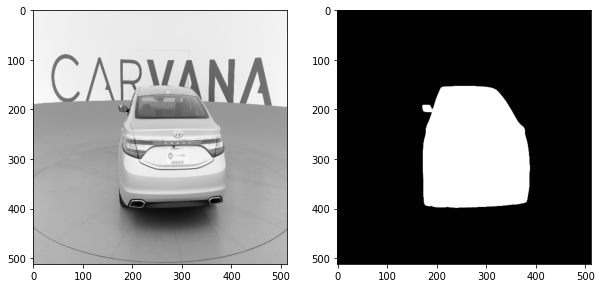

In [58]:
plt.figure(figsize=(10,8))
plt.subplot(1,2,1)
im = train_dataset[0][0]
print(im.detach().cpu().numpy().shape)
plt.imshow(im[0].detach().cpu().numpy(), 'gray')
plt.subplot(1,2,2)
mask = train_dataset[0][1]
plt.imshow(mask[0].detach().cpu().numpy(), 'gray')

In [59]:
from collections import OrderedDict

import torch
import torch.nn as nn

class UNet(nn.Module):

    def __init__(self, in_channels=3, out_channels=1, init_features=16):
        super(UNet, self).__init__()

        features = init_features
        self.encoder1 = UNet._block(in_channels, features, name="enc1")
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.encoder2 = UNet._block(features, features * 2, name="enc2")
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.encoder3 = UNet._block(features * 2, features * 4, name="enc3")
        self.pool3 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.encoder4 = UNet._block(features * 4, features * 8, name="enc4")
        self.pool4 = nn.MaxPool2d(kernel_size=2, stride=2)

        self.bottleneck = UNet._block(features * 8, features * 16, name="bottleneck")

        self.upconv4 = nn.ConvTranspose2d(
            features * 16, features * 8, kernel_size=2, stride=2
        )
        self.decoder4 = UNet._block((features * 8) * 2, features * 8, name="dec4")
        self.upconv3 = nn.ConvTranspose2d(
            features * 8, features * 4, kernel_size=2, stride=2
        )
        self.decoder3 = UNet._block((features * 4) * 2, features * 4, name="dec3")
        self.upconv2 = nn.ConvTranspose2d(
            features * 4, features * 2, kernel_size=2, stride=2
        )
        self.decoder2 = UNet._block((features * 2) * 2, features * 2, name="dec2")
        self.upconv1 = nn.ConvTranspose2d(
            features * 2, features, kernel_size=2, stride=2
        )
        self.decoder1 = UNet._block(features * 2, features, name="dec1")

        self.conv = nn.Conv2d(
            in_channels=8, out_channels=out_channels, kernel_size=1
        )
        self.conv_last = nn.Conv2d(features, 8, kernel_size = 3, padding=1)

    def forward(self, x):
        enc1 = self.encoder1(x)
        enc2 = self.encoder2(self.pool1(enc1))
        enc3 = self.encoder3(self.pool2(enc2))
        enc4 = self.encoder4(self.pool3(enc3))

        bottleneck = self.bottleneck(self.pool4(enc4))

        dec4 = self.upconv4(bottleneck)
        dec4 = torch.cat((dec4, enc4), dim=1)
        dec4 = self.decoder4(dec4)
        dec3 = self.upconv3(dec4)
        dec3 = torch.cat((dec3, enc3), dim=1)
        dec3 = self.decoder3(dec3)
        dec2 = self.upconv2(dec3)
        dec2 = torch.cat((dec2, enc2), dim=1)
        dec2 = self.decoder2(dec2)
        dec1 = self.upconv1(dec2)
        dec1 = torch.cat((dec1, enc1), dim=1)
        dec1 = self.decoder1(dec1)
        dec1 = self.conv_last(dec1)
        return torch.sigmoid(self.conv(dec1))

    @staticmethod
    def _block(in_channels, features, name):
        return nn.Sequential(
            OrderedDict(
                [
                    (
                        name + "conv1",
                        nn.Conv2d(
                            in_channels=in_channels,
                            out_channels=features,
                            kernel_size=3,
                            padding=1,
                            bias=False,
                        ),
                    ),
                    (name + "norm1", nn.BatchNorm2d(num_features=features)),
                    (name + "relu1", nn.ReLU(inplace=True)),
                    (
                        name + "conv2",
                        nn.Conv2d(
                            in_channels=features,
                            out_channels=features,
                            kernel_size=3,
                            padding=1,
                            bias=False,
                        ),
                    ),
                    (name + "norm2", nn.BatchNorm2d(num_features=features)),
                    (name + "relu2", nn.ReLU(inplace=True)),
                ]
            )
        )

In [60]:
model = UNet(1,1)
model.cuda()

UNet(
  (encoder1): Sequential(
    (enc1conv1): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (enc1norm1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (enc1relu1): ReLU(inplace=True)
    (enc1conv2): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (enc1norm2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (enc1relu2): ReLU(inplace=True)
  )
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (encoder2): Sequential(
    (enc2conv1): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (enc2norm1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (enc2relu1): ReLU(inplace=True)
    (enc2conv2): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (enc2norm2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, tra

In [61]:
criterion = nn.BCELoss()

train_losses = []
val_losses = []

train_metrics = []
val_metrics = []

hist = {"train_loss": [],
        "train_iou": [],
        "val_loss": [],
        "val_iou": []}

In [63]:
lr = 1e-4
optimizer = optim.Adam(model.parameters(), lr)
num_epochs = 10

In [64]:
### Target metric ###
def calc_iou(
    prediction: np.array,
    ground_truth: np.array
    ) -> np.array:
    """
    Function for computing IoU metrics.

    Args:
        prediction: batch of binarized predicted masks (either 0 or 1)
        ground_truth: batch of binary GT masks (either 0 or 1)
    Returns:
        calculated iou: np.array
    """
    n_images = len(prediction)
    intersection, union = 0, 0
    for i in range(n_images):
        intersection += np.logical_and(prediction[i] > 0, ground_truth[i] > 0).astype(np.float32).sum() 
        union += np.logical_or(prediction[i] > 0, ground_truth[i] > 0).astype(np.float32).sum()
    return float(intersection) / union

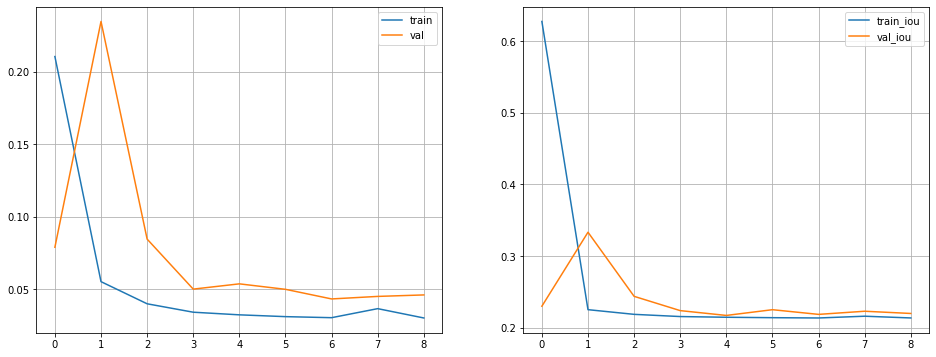

In [65]:
for i in range(num_epochs):
    
    if i>0:
         #print("Epoch %d/%d\t Loss mean: %f\t IoU mean: %f"% \
         #      (i, num_epochs, epoch_loss, epoch_iou))
         #print("Epoch %d/%d\t Val Loss mean: %f\t Val IoU mean: %f"% \
         #      (i, num_epochs, val_loss, val_iou))
    
         plt.figure(figsize=(16, 6))
         plt.subplot(121)
         plt.plot(hist['train_loss'], label='train')
         plt.plot(hist['val_loss'], label='val')
         plt.legend()
         plt.grid()
        
         plt.subplot(122)
         plt.plot(hist['train_iou'], label='train_iou')
         plt.plot(hist['val_iou'], label='val_iou')
         plt.legend()
         plt.grid()
         plt.show()

    epoch_losses = []
    epoch_ious = []
    val_losses = []
    val_ious = []
    
    model.train()
    for k, (img, mask) in enumerate(train_loader):  
        optimizer.zero_grad()
        y_pred = model(img.cuda())
        loss = criterion(y_pred, mask.cuda())
        
        loss.backward()
        optimizer.step()
        epoch_losses.append(loss.item())
        iou = calc_iou(y_pred.cpu().detach().numpy()>0.1, 
                                  mask.numpy())
        epoch_ious.append(iou)
        
        
        #if k%5 == 0:
        #    print("Epoch: %d \tLoss: %f"%(i+1, loss.item()))
    
    epoch_loss = np.mean(np.array(epoch_losses))
    epoch_iou = np.mean(np.array(epoch_ious))
    hist['train_iou'].append(epoch_iou)
    hist['train_loss'].append(epoch_loss)
    with torch.no_grad():
        model.eval()
        for k, (img, mask) in enumerate(val_loader):
            y_pred = model(img.cuda())
            loss = criterion(y_pred, mask.cuda())
            iou = calc_iou(y_pred.cpu().detach().numpy()>0.15, 
                                  mask.numpy())
            val_losses.append(loss.item())
            val_ious.append(iou)
            
            
            
    val_loss = np.mean(np.array(val_losses))
    val_iou = np.mean(np.array(val_ious))
    hist['val_loss'].append(val_loss)
    hist['val_iou'].append(val_iou)
    if i < (num_epochs - 1):
        clear_output()

In [1]:

train_features, train_labels = next(iter(train_loader))
print(train_features.shape)
y_features = model(train_features.cuda())

NameError: ignored

(512, 512)


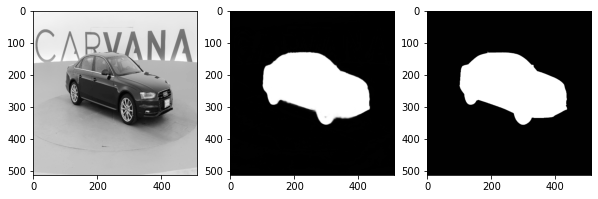

In [138]:
plt.figure(figsize=(10,8))
plt.subplot(1,3,1)
im = train_features[0][0]
print(im.detach().cpu().numpy().shape)
plt.imshow(im.detach().cpu().numpy(), 'gray')
plt.subplot(1,3,2)
mask = y_features[0][0]
plt.imshow(mask.detach().cpu().numpy(), 'gray')
plt.subplot(1,3,3)
mask1 = train_labels[0][0]
plt.imshow(mask1.detach().cpu().numpy(), 'gray')

In [139]:
torch.save(model.state_dict(), 'model.pt')